In [43]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

%matplotlib inline

In [44]:
data =  pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

In [45]:
data.head(4)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5


In [4]:
data.shape

(200, 4)

In [46]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [48]:
lm1 = smf.ols(formula= 'Sales ~ TV', data = data).fit()
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [51]:
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

lm2 = LinearRegression()
lm2.fit(X,y)

print lm2.intercept_
print lm2.coef_

7.03259354913
[ 0.04753664]


In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

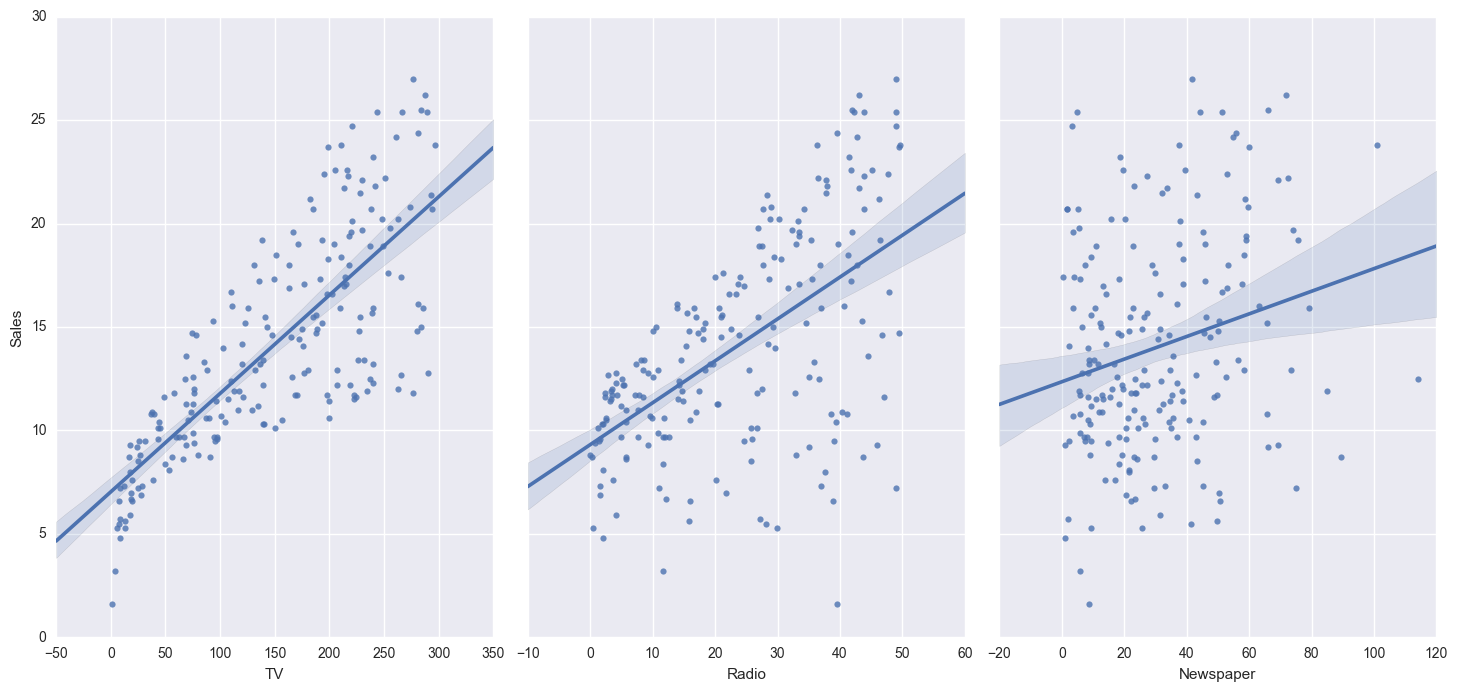

In [8]:
sns.pairplot(data,x_vars = ['TV','Radio','Newspaper'], y_vars ='Sales',size=7,aspect = 0.7,kind = 'reg')

In [13]:
feature_cols = ['TV','Radio','Newspaper']

In [14]:
X = data[feature_cols]

In [17]:
X = data[['TV','Radio','Newspaper']]

In [18]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [19]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [21]:
y = data['Sales']
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [22]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state =1)

In [27]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150,)
(50, 3)
(50,)


In [28]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [31]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [32]:
y_pred = linreg.predict(X_test)

In [33]:
true =[100,50,30,20]
pred= [90, 50, 50, 30]

In [34]:
print(10 +0 +20+10)/4

from sklearn import metrics
print metrics.mean_absolute_error(true, pred)

10
10.0


In [35]:
print(10 ** 2 + 0**2 +20 ** 2+ 10**2)/4
print metrics.mean_squared_error(true, pred)

150
150.0


In [36]:
import numpy as np
print np.sqrt((10 **2 + 0**2 +20**2 + 10**2)/4.)

print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139
12.2474487139


In [37]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


In [41]:
feature_cols =['TV','Radio']

x = data[feature_cols]
y = data.Sales

X_train, X_test,y_train, y_test = train_test_split(X, y , random_state =1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303
